In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections

import matplotlib.collections
import matplotlib.patches
import matplotlib.colors
import cmocean.cm

import gridded
from gridded.variable import Variable
from gridded.grids import Grid
from gridded.grids import Grid_U
import xarray as xr
import netCDF4
%matplotlib inline

In [14]:
import pyugrid

In [2]:
file_nc = r'T:\2mattijn\c01_harlingen\dflowfm\dflowfmoutput\001_map.nc'

In [25]:
# open the opendap url
#ds = netCDF4.Dataset(file_nc)
ds = xr.open_dataset(file_nc)
# read it as a UGrid
ug = pyugrid.UGrid.from_ncfile(file_nc)

In [29]:
# now we lookup the faces that are not completely filled
non_filled_faces, = np.nonzero(ug.faces.mask.any(axis=1))
# or we can look up how many nodes are in a cell
n_nodes_per_face = (~ug.faces.mask).sum(axis=1)
# you could use this to speed up rendering by plotting triangles as is and splitting up quads
# or we can use it to create a list of non equally size coordinates (a ragged array)
ragged = [
    face[:n_nodes].filled()
    for n_nodes, face 
    in zip(n_nodes_per_face, ug.faces)
]
print("we changed", ug.faces[non_filled_faces[0]], "into", ragged[non_filled_faces[0]])

we changed [4491 4586 4587 4492 --] into [4491 4586 4587 4492]


In [30]:
# list of coordinates of all the triangles and quads
faces = [ug.nodes[face] for face in ragged]
# lookup velocity in x,y directions at last timestep
ucx = ds.variables['mesh2d_ucx'][-1,:]
ucy = ds.variables['mesh2d_ucy'][-1,:]
# compute absolute velocity
var = np.sqrt(ucx**2 +  ucy**2)

In [37]:
domain = 0, var.max()
# define a normalization function
N = matplotlib.colors.Normalize(*domain)
# pick a corresponding colormap
cmap = cmocean.cm.speed

# Let's draw general polygons
patches = (matplotlib.patches.Polygon(face) for face in faces)
# add them all at once
patch_collection = matplotlib.collections.PatchCollection(patches, edgecolor='none')
# set the face colors to the color of the data
patch_collection.set_facecolor(cmap(N(var)))

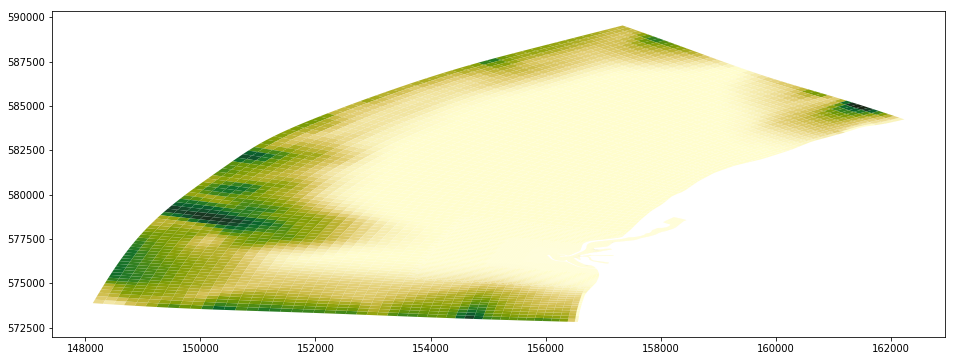

In [38]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# def make_map(projection=ccrs.PlateCarree()):
#     fig, ax = plt.subplots(figsize=(16, 6),
#                            subplot_kw=dict(projection=projection))
#     gl = ax.gridlines(draw_labels=True)
#     gl.xlabels_top = gl.ylabels_right = False
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     return fig, ax
#fig, ax = make_map()
fig, ax = plt.subplots(figsize=(16, 6))
ax.add_collection(patch_collection)
ax.autoscale()

In [12]:
nodes = np.ma.column_stack((ds['mesh2d_node_x'], ds['mesh2d_node_y']))
faces = np.ma.column_stack((ds['mesh2d_face_x'], ds['mesh2d_face_y']))
edges = np.ma.column_stack((ds['mesh2d_edge_x'], ds['mesh2d_edge_y']))
# faces = None,
# edges = None,
# boundaries = None,
# face_face_connectivity = None,
# face_edge_connectivity = None,
# edge_coordinates = None,
# face_coordinates = None,
# boundary_coordinates = None,
# data = None,
# mesh_name = "mesh",

df_gr = Grid_U(nodes=nodes, faces=faces, edges=edges)

In [28]:
df_gr

In [7]:
np.ma.column_stack((ds['mesh2d_node_x'], ds['mesh2d_node_y']))

masked_array(
  data=[[158196.02716407628, 578677.5067628893],
        [158182.58789536185, 578657.943220258],
        [158170.30612363535, 578640.0465287133],
        [158158.17442273363, 578622.3685166328],
        [158147.84566643898, 578607.317710482],
        [158134.45103136115, 578587.7993822083],
        [158123.92123971335, 578572.455632353],
        [158111.0206273912, 578553.6571817215],
        [158099.13613131846, 578536.3393903545],
        [158085.13191725872, 578515.2457008112],
        [158076.0577792345, 578499.1253725046],
        [158065.5997531677, 578480.5465484678],
        [158054.0517562079, 578460.0313764724],
        [158045.1257728052, 578444.1742468446],
        [158052.37053755537, 578428.3504818024],
        [158069.01564425207, 578410.5700023512],
        [158083.12943729, 578395.9549700406],
        [158098.38191625263, 578380.3066013312],
        [158111.2429289792, 578369.1404382956],
        [158130.2659952859, 578353.4430474502],
        [158147.655

<xarray.DataArray 'mesh2d_node_x' (nmesh2d_node: 12845)>
array([158196.027164, 158182.587895, 158170.306124, ..., 156127.968088,
       156163.851443, 156163.61466 ])
Coordinates:
    mesh2d_node_x  (nmesh2d_node) float64 1.582e+05 1.582e+05 1.582e+05 ...
    mesh2d_node_y  (nmesh2d_node) float64 ...
Dimensions without coordinates: nmesh2d_node
Attributes:
    units:          m
    standard_name:  projection_x_coordinate
    long_name:      x-coordinate of mesh nodes
    mesh:           mesh2d
    location:       node

In [ ]:

grid = Grid_U(node_lon=dataset['mesh2d_node_x'], node_lat=['mesh2d_node_y'], faces=...)

In [30]:
Grid.from_netCDF(filename=file_nc, grid_type='UGrid', grid_topology={
                 'longitude': 'projection_x_coordinate', 'latitude': 'projection_y_coordinate'})

ValueError: Node coordinates standard_name is neither "longitude" nor "latitude" 

In [ ]:
Variable.from_netCDF(file_nc, )

### define potential variables from `gridded` package

In [2]:
x = np.array([-0.101, -0.08 , -0.069, -0.054, -0.09 , -0.069, -0.069, -0.08 , -0.08 , -0.085, 
              -0.087, -0.097, -0.104, -0.102, -0.115, -0.099,-0.052, -0.052, -0.069, -0.064, 
              -0.045, -0.052, -0.04 , -0.026, 0.017,  0.012,  0.027,  0.019,  0.001, -0.012, 
              -0.029, -0.038,-0.03 , -0.007, -0.057, -0.025, -0.077, -0.059])
y = np.array([0.872, 0.883, 0.888, 0.89 , 0.904, 0.907, 0.921, 0.919, 0.966, 0.973, 0.965, 
              0.965, 0.987, 0.993, 1.001, 0.996, 1.022, 1.017,1.01 , 1.005, 0.98 , 0.975, 
              0.973, 0.968, 0.9  , 0.895, 0.893,0.886, 0.883, 0.884, 0.883, 0.879, 0.907, 
              0.905, 0.916, 0.933,0.99 , 0.993])

In [3]:
# create lon and lat array
lon = np.degrees(x)
lat = np.degrees(y)

In [4]:
# create faces with 3, 4 and 5 vertices
faces = np.array([[13, 10, 22, -999, -999], 
                  [30, 27, 24,   32, -999],
                  [30, 32,  7,    4,    2],
                  [ 0,  2,  4, -999, -999],
                  [ 7, 32, 24,   22,   10]]) 

In [5]:
# fill value to fill vertices up to max nodes in face
fill_val = -999

In [6]:
# data value for faces
data_color = np.array([1, 2, 3, 4, 5])

### filter the faces using the `fill_val`

In [7]:
# start filtering the fill value from the faces
faces = np.array([i[i != fill_val] for i in faces])
faces

array([array([13, 10, 22]), array([30, 27, 24, 32]),
       array([30, 32,  7,  4,  2]), array([0, 2, 4]),
       array([ 7, 32, 24, 22, 10])], dtype=object)

### combine `lon` and `lat` and slice using `faces`

In [8]:
# stack array along last axis
lonlat = np.c_[lon, lat]
patches = np.array([lonlat[face] for face in faces])
patches[0]

array([[-5.84416951, 56.89470906],
       [-4.98473282, 55.29042723],
       [-2.29183118, 55.74879347]])

### plot the figure using `PolyCollection` for both `facecolor` and `edgecolor`

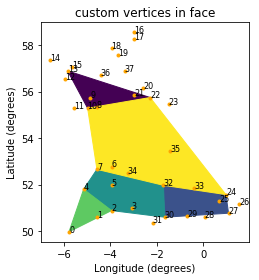

In [9]:
# figure uses coloring for both facecolor and edgecolor
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# add collection of faces with color for face and edge
pc_face = matplotlib.collections.PolyCollection(patches, array=data_color, 
                                                cmap='viridis', edgecolor='face')
ax.add_collection(pc_face)

plt.plot(lon, lat, marker=".", ls="", color="orange")

plt.title('custom vertices in face')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

for i, (xi,yi) in enumerate(lonlat):
    plt.text(xi,yi,i, size=8)

plt.tight_layout()
plt.show()

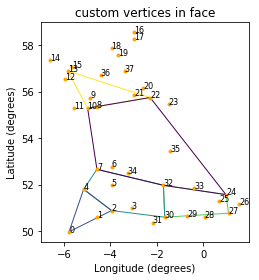

In [10]:
# figure uses coloring for edgecolor only
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# add collection of faces with edgecolor only
pc_edge = matplotlib.collections.PolyCollection(patches, array=data_color, 
                                                cmap='viridis_r', color='', facecolor='none')
ax.add_collection(pc_edge)

plt.plot(lon, lat, marker=".", ls="", color="orange")

plt.title('custom vertices in face')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

for i, (xi,yi) in enumerate(lonlat):
    plt.text(xi,yi,i, size=8)

plt.tight_layout()
plt.show()